# Data Science: Probando relaciones con regresión lineal

# Alumno: Pablo Matiás Monsalvo - G8 ONE 22/06/2025

##  02 Preparando el ambiente

En este curso, estableceremos el precio de venta de casas, analizando las diversas características que influyen en su fijación de precios. Para alcanzar este objetivo, utilizaremos la regresión lineal como metodología. Cabe recordar que todos los análisis se realizarán en Colab para facilitar el proceso.

Por eso, es importante que descargues el notebook con la estructura del proyecto que se construirá a lo largo de esta jornada de aprendizaje.

**Base de datos**

Utilizamos como inspiración la famosa base de datos `House Price de Kaggle`. Hicimos algunas transformaciones en la base original para garantizar un mejor aprendizaje de las técnicas presentadas en este curso. Descarga la base de datos y, a continuación, carga el archivo en Colab.

### Consulta a continuación los campos disponibles para análisis:

**area_primer_piso:**

Se refiere al área del primer piso de la propiedad, medida en metros cuadrados.

**existe_segundo_piso:**

 Esta variable es binaria, indicando si la propiedad tiene o no un segundo piso. Puede ser representada como 1 para "sí" y 0 para "no".

**area_segundo_piso:**

 Si la propiedad tiene un segundo piso, esta variable representa el área total del segundo piso, medida en metros cuadrados.

**cantidad_baños:**

 Indica el número total de baños en la propiedad.

**capacidad_coches_garaje:**

 Esta variable indica la capacidad del garaje de la propiedad, es decir, el número máximo de coches que pueden estacionarse en el garaje.

**calidad_de_la_cocina_Excelente:**

 Esta es una variable categórica que evalúa la calidad de la cocina en la propiedad. En este caso, se asume que si la cocina es considerada "Excelente" se representa por 1, y de lo contrario, por 0.

**precio_de_venta:**

 Este es el precio de venta de la propiedad en reales. Es la variable objetivo que se intenta predecir utilizando los otros atributos de la propiedad.

## 03 Conociendo los datos


# Precios de propiedades

**Objetivo**: Estimar precios de propiedades
* Identificar los aspectos que influyen en el precio de una propiedad
* Entender qué aspecto es más relevante y cuál influye más en el precio de una propiedad.
* Fijar el precio de una propiedad nueva.

Base de dados simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajuste de una línea recta

## Conociendo los datos

In [1]:
import chardet

with open('../data/Preços_de_casas.csv', 'rb') as f:
    raw_data = f.read(100000) # Lee los primeros 100KB del archivo
    result = chardet.detect(raw_data)
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

datos = pd.read_csv('../data/Preços_de_casas.csv')

datos.head(2)

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [4]:
#¿Qué factores se recogen?
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
datos = datos.drop(columns= 'Id')
datos.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

### Luri - Resumen: 

En esta clase del curso "Data Science: probando relaciones con regresión lineal", se introduce el desafío de estimar el precio de propiedades inmobiliarias utilizando un modelo de regresión lineal. Se explica que el objetivo principal es identificar qué características de los inmuebles influyen en su precio y determinar cuál es el atributo más relevante.

Se utiliza una base de datos de Kaggle llamada "House Prices" y se comienza con la importación de datos en un cuaderno de Colab. Se carga el archivo Precios Casas y se visualizan las primeras filas del conjunto de datos, que incluye atributos como el área del primer y segundo piso, la cantidad de baños, la capacidad de garaje, la calidad de la cocina y el precio de venta.

Además, se realiza un análisis de metadatos utilizando el método info() para verificar la integridad de los datos y se decide eliminar la columna id, ya que no es relevante para el modelado. Finalmente, se prepara el DataFrame para el análisis posterior de las relaciones entre las variables.

## 04 Correlación


## Correlación

¿Qué factores se relacionan con el precio de una vivienda? ¿Cómo es esta relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* -1: indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.

* 0: no existe una relación lineal entre las variables.

* 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.


In [6]:
# Correlación
corr = datos.corr()
corr

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
area_primeiro_andar,1.000000,-0.376805,-0.253793,0.369368,0.481231,0.323496,0.616557
existe_segundo_andar,-0.376805,1.000000,0.917101,0.292780,-0.001284,-0.020045,0.138541
area_segundo_andar,-0.253793,0.917101,1.000000,0.412777,0.131938,0.025248,0.305311
quantidade_banheiros,0.369368,0.292780,0.412777,1.000000,0.409281,0.154102,0.563132
capacidade_carros_garagem,0.481231,-0.001284,0.131938,0.409281,1.000000,0.276759,0.640214
qualidade_da_cozinha_Excelente,0.323496,-0.020045,0.025248,0.154102,0.276759,1.000000,0.496223
preco_de_venda,0.616557,0.138541,0.305311,0.563132,0.640214,0.496223,1.000000


In [7]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

## Luri - Resumen: 

En esta clase del curso "Data Science: probando relaciones con regresión lineal", se aborda el análisis de correlación utilizando una base de datos que incluye atributos como el área del primer y segundo piso, la existencia de un segundo piso, la cantidad de baños, la capacidad del garaje, la calidad de la cocina y el precio de venta de las casas.

El objetivo principal es entender cómo estos atributos se relacionan con el precio de venta, que es la variable dependiente. Se utiliza el método de correlación de Pearson para determinar la intensidad y dirección de estas relaciones. Los valores de correlación varían de -1 a 1, donde valores negativos indican una relación inversa y valores positivos indican una relación directa.

Se presentan ejemplos de correlaciones, como el área del primer piso con una correlación positiva de 0.61 y la capacidad del garaje con 0.64. También se menciona que la calidad de la cocina tiene una correlación de 0.49. Finalmente, se propone una actividad para analizar qué factores están más correlacionados entre sí, preparando el terreno para explorar visualizaciones de estas correlaciones en la próxima clase.

##  05 Manos a la obra: mapa de calor de correlación

¿Vamos a practicar el concepto de correlación?

Durante la clase, exploramos la correlación entre cada característica de la casa y su precio; sin embargo, el coeficiente de correlación también se puede aplicar a cualquier par de variables.

En esta actividad, analiza la correlación de todas las variables a través de una forma visual, ejecutando el código a continuación en una celda de tu notebook.

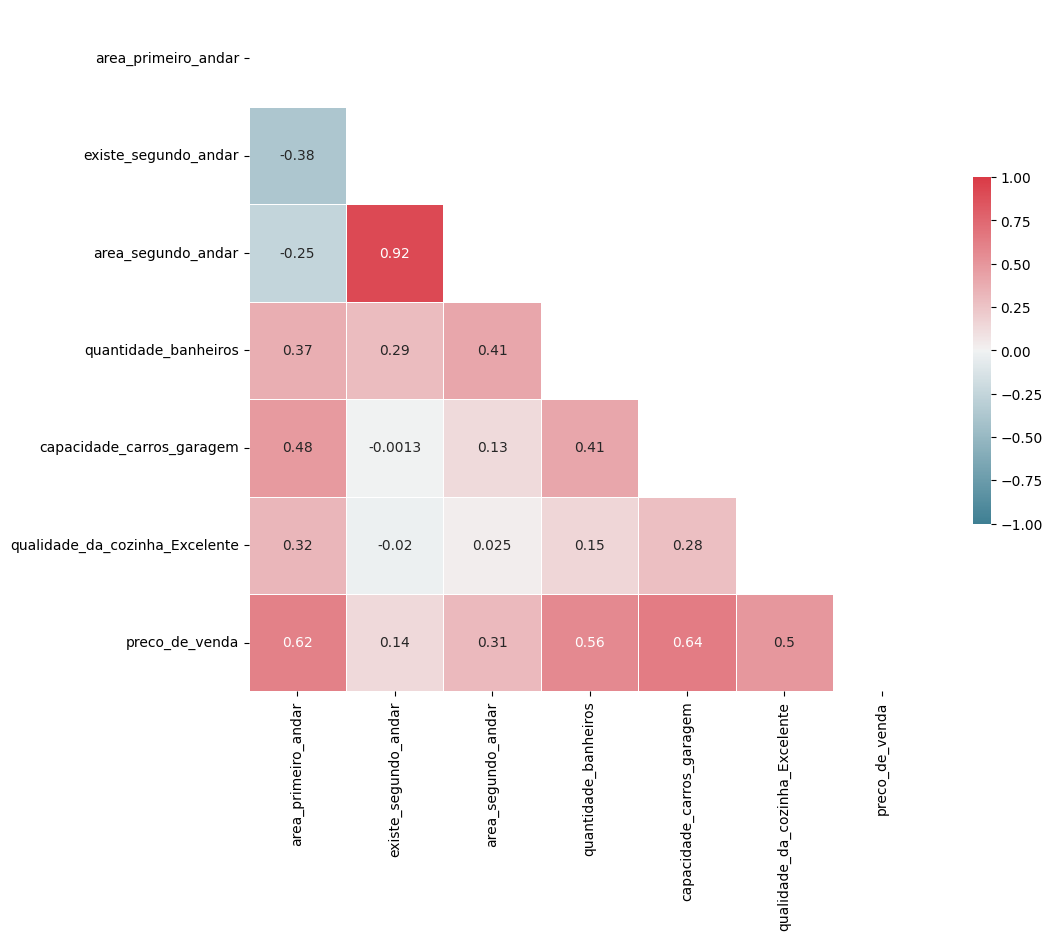

In [8]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv('../data/Preços_de_casas.csv')
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

### Consejo: Presta atención a los puntos a continuación para un análisis completo:

* **Intensidad:**

 se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.

* **Dirección:**

 se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

**Ejemplo:**

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

### Opinión del instructor

Al ejecutar el código, podemos obtener el siguiente diagrama:

![regresion.png](/home/pol/Escritorio/ipynb-alura/assets/regresion.png)

### Enumeramos algunos coeficientes para analizar:

* La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.

* Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.

* Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.

**Observación**: Es importante notar que la correlación no implica causalidad; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

## 06 Representación lineal


## Relacionando variables

In [9]:
datos.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

In [10]:
# importandolos los paquetes necesarios para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


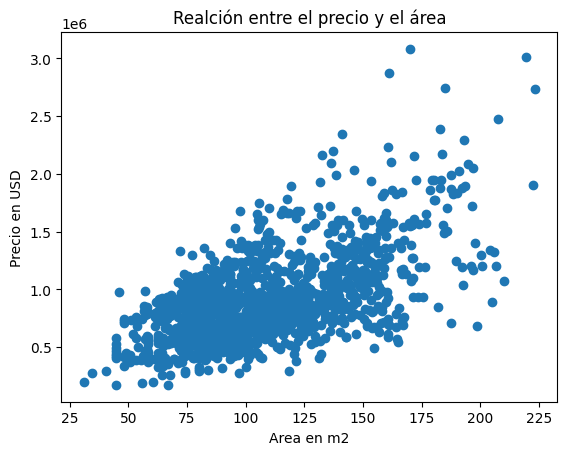

In [11]:
# Como se relacionan el área construida y el precio del inmueble?
plt.scatter(datos['area_primeiro_andar'], datos['preco_de_venda'])
plt.title('Realción entre el precio y el área')
plt.xlabel('Area en m2')
plt.ylabel('Precio en USD')
plt.show() # Gráfico de dispersión


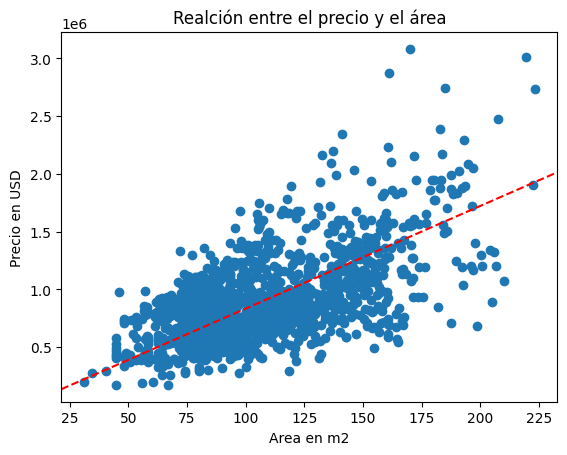

In [12]:
# Aparentemente, cuanto mayor sea el área del primer piso, mayor será el precio de la casa.
# ¿Qué pasaría si quisiéramos dibujar una línea que representara mejor este comportamiento?
plt.scatter(datos['area_primeiro_andar'], datos['preco_de_venda'])
plt.axline(xy1=(40,300000),xy2=(175,1500000), color='red', linestyle='--', label='Línea de tendencia')
plt.title('Realción entre el precio y el área')
plt.xlabel('Area en m2')
plt.ylabel('Precio en USD')
plt.show() # Gráfico de dispersión






## Luri - Resumen:

En esta clase del curso "Data Science: probando relaciones con regresión lineal", se aborda el análisis de una base de datos que incluye diversos atributos de casas, como el área del primer y segundo piso, la cantidad de baños, la capacidad del garaje, la calidad de la cocina y el precio de venta, que es la variable dependiente.

El objetivo del análisis es entender cómo estos atributos se relacionan con el precio de venta utilizando el método de correlación de Pearson. Este método permite determinar la intensidad y dirección de la relación entre los atributos y el precio. Los valores de correlación varían de -1 a 1, donde -1 indica una correlación negativa, 0 indica ninguna correlación y 1 indica una correlación positiva perfecta.

Se presentan los resultados de la correlación, destacando que el área del primer piso tiene una correlación positiva de 0.61 con el precio de venta, mientras que otros atributos como la cantidad de baños y la capacidad del garaje también muestran correlaciones positivas significativas.

Finalmente, se propone una actividad de análisis para comparar las correlaciones entre diferentes atributos y se anticipa que en la próxima clase se explorarán formas de visualizar estas correlaciones.

##  07 Formatos de los gráficos de dispersión

Sara está analizando datos y decidió construir varios gráficos de dispersión para comprender la relación entre las variables de su conjunto de datos. Ahora, vamos a ayudar a Sara a entender lo que representa cada gráfico.

Con base en los gráficos de dispersión realizados por Sara, ¿cuál de los siguientes análisis es correcto? Elige una alternativa.



![dispersion-1.png](/home/pol/Escritorio/ipynb-alura/assets/dispersion-1.png)

### Los puntos están esparcidos aleatoriamente, sin mostrar ninguna tendencia clara entre las variables.

* El gráfico de dispersión es una excelente herramienta para identificar tendencias entre variables, sin embargo, también es posible identificar la ausencia de correlación entre las variables, es decir, cuando no tienen una relación lineal clara entre sí, presentando, de esta forma, puntos dispuestos de manera aleatoria.

## Luri - Analogía:

Claro, vamos a desglosar el enunciado del ejercicio usando una analogía.

Imagina que Sara es una chef que está tratando de entender cómo diferentes ingredientes afectan el sabor de un plato. Para ello, decide hacer varias pruebas, combinando distintos ingredientes y anotando los resultados. Cada combinación de ingredientes representa una variable en su conjunto de datos.

Ahora, los gráficos de dispersión son como las notas que Sara toma sobre cómo cada combinación afecta el sabor. Al observar estos gráficos, ella puede ver patrones: algunas combinaciones hacen que el plato sea más sabroso, mientras que otras no parecen tener un efecto claro.

En este ejercicio, se le pide a Sara que analice esos gráficos de dispersión para identificar si hay una relación entre los ingredientes (variables) y el sabor (resultado). Cada opción de respuesta representa una interpretación diferente de lo que ella podría observar en sus notas.

Así que, al igual que Sara intenta entender la relación entre los ingredientes y el sabor, tú debes analizar los gráficos para ver qué tipo de relación existe entre las variables que se presentan. ¿Te parece útil esta analogía?

## 08 Obteniendo la mejor recta


In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [15]:
#¿Qué línea se ajusta mejor a la relación?
import plotly.express as px

px.scatter(datos, x='area_primeiro_andar', y='preco_de_venda',trendline_color_override='red' ,trendline='ols')




## Luri - Resumen: 

En esta clase, se introdujo el método de mínimos cuadrados ordinarios (OLS) para encontrar la línea que mejor se ajusta a la relación entre el precio de venta y el área de una propiedad. Se explicó que, aunque en un video anterior se trazó una línea de forma empírica, el objetivo ahora es minimizar la distancia de cada observación a esta línea.

Se utilizó la biblioteca Plotly Express para crear un gráfico interactivo, donde se representó el área del primer piso en el eje X y el precio de venta en el eje Y, añadiendo una línea de tendencia en color rojo utilizando OLS. Se destacó que el precio por metro cuadrado es de aproximadamente 6,900 dólares y se mencionó un valor de intercepción de 144,000 dólares.

Finalmente, se observó que la línea de tendencia describe mejor el conjunto de datos y se anticipó que en la próxima clase se profundizará en el funcionamiento de esta recta.

##  09 ¿Qué aprendimos?

En esta clase, aprendiste a:

* **Obtener el coeficiente de correlación de los datos;**

* **Analizar la intensidad y la dirección de la correlación entre dos variables;**

* **Identificar la linealidad en el gráfico de dispersión;**

* **Diferenciar la variable explicativa de la variable respuesta;**

* **Visualizar la mejor línea utilizando Plotly.**


# 02 - Explicación de la recta
## 02 Segmentando la base



Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa basándonos en su tamaño, por lo que decimos que:

* Variable explicativa/independiente: Superficie del primer piso

* Variable de respuesta/dependiente: Precio de la casa

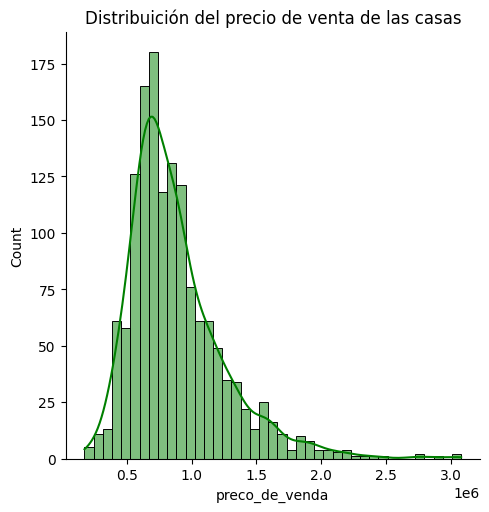

In [16]:
#¿Quién es nuestra variable de respuesta?

sns.displot(datos['preco_de_venda'], kde=True, color='green')
plt.title('Distribuición del precio de venta de las casas')
plt.show()

### Separación entre entrenamiento y prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se utiliza para evaluar su rendimiento en la predicción de precios de vivienda no observados durante el entrenamiento, lo que facilita la generalización del modelo.

In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# import train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv('../data/Preços_de_casas.csv')
Y = datos['preco_de_venda']
X = datos.drop(columns=['preco_de_venda'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=230) # garantizar la reproductibilidad de la segregación de los datos

In [19]:
#Datos de entrenamiento para utilizar la fórmula

df_train = pd.DataFrame(x_train)
df_train['preco_de_venda'] = y_train

In [20]:
# import ols
from statsmodels.formula.api import ols


In [21]:
# ajustando el primer modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()


## Luri - Resumen:

En esta clase, se aborda el concepto de la ecuación de la recta, fundamental para entender la regresión lineal. Se explica que la ecuación ( y = mx + b ) representa la relación entre una variable independiente (área de la casa) y una variable dependiente (precio de la casa). Se introduce el uso de histogramas para analizar la distribución de precios de venta de casas, destacando la importancia de la concentración de precios en ciertos rangos.

Se discute la creación de un modelo de regresión, donde se segmenta la base de datos en conjuntos de entrenamiento y prueba utilizando el método `train_test_split` de `sklearn`. Se define la variable dependiente ( Y ) (precio de venta) y la variable independiente ( X ) (atributos restantes).

Finalmente, se menciona la creación de un `DataFrame` de entrenamiento que incluye tanto las variables independientes como la dependiente, y se introduce el uso de `OLS` para entrenar el modelo de regresión. En la próxima clase, se analizarán los coeficientes del modelo.

## Luri - Analogía:
 Imaginemos que estamos construyendo una casa, y para ello necesitamos entender cómo se relacionan diferentes elementos en su diseño. En esta clase, la ecuación de la recta ( y = mx + b ) es como el plano de nuestra casa, donde ( m ) representa la inclinación del techo (la pendiente) y ( b ) es el punto donde el techo se encuentra con la pared (la intersección con el eje ( y )). Así, al igual que un buen plano nos ayuda a construir una casa sólida, esta ecuación nos ayuda a entender la relación entre el área de una casa y su precio.

Ahora, cuando analizamos los precios de venta de las casas, es como observar un vecindario. Al crear un histograma, estamos visualizando cuántas casas hay en diferentes rangos de precios, como si estuviéramos contando cuántas casas de diferentes colores hay en la calle. Notamos que la mayoría de las casas están en un rango de precios específico, como si la mayoría de las casas fueran de color azul y solo unas pocas fueran de colores raros. Esto nos ayuda a identificar dónde se concentran las "casas" (o precios) y a entender mejor el mercado.

Al construir nuestro modelo de regresión, es como si estuviéramos eligiendo los materiales adecuados para nuestra casa. Dividimos nuestra base de datos en un conjunto de entrenamiento y uno de prueba, como si estuviéramos probando diferentes combinaciones de materiales en una parte de la casa antes de decidir cómo construir el resto. El conjunto de entrenamiento nos ayuda a aprender y ajustar nuestro modelo, mientras que el conjunto de prueba nos permite verificar si nuestra construcción es sólida y si se sostiene bien.

Finalmente, al crear un DataFrame de entrenamiento, estamos organizando todos nuestros materiales y herramientas en un solo lugar, asegurándonos de que todo esté listo para construir nuestra casa de manera eficiente. En la próxima clase, analizaremos los "detalles de construcción" (coeficientes) que nos dirán cómo ajustar la inclinación del techo y la altura de las paredes para que nuestra casa sea perfecta.

##  03 Separando el conjunto de datos

Diana está comenzando sus estudios en ciencia de datos y se dio cuenta de que separar conjuntos de datos en entrenamiento y prueba es una práctica recurrente en machine learning.

Con base en esto, surge la pregunta: ¿Cuál es la principal razón para dividir un conjunto de datos en conjuntos de entrenamiento y prueba al construir modelos de machine learning? Elige una alternativa.

### Para evaluar el desempeño del modelo en datos no vistos.

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es una práctica esencial en machine learning para evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se usa para entrenar el modelo, mientras que el conjunto de prueba se mantiene separado y se usa para evaluar el desempeño del modelo en datos no vistos, simulando cómo se comportaría el modelo al ser aplicado en situaciones reales.

## 04 Analizando los coeficientes


(intensidad, dirección y significación)




In [22]:
# visualizando los parámetros

modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [23]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        08:20:19   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* La **intersección** es el valor esperado del precio de la vivienda cuando todas las demás variables son cero. En este caso, cuando todas las demás variables y el área del primer piso son cero, el precio esperado de la vivienda es de R$ 145.196,40. No siempre existe una interpretación práctica de esta cifra.

* El **efecto individual** del área es 6833,97. Esto indica que por cada m² añadido al área del primer piso, se espera que el precio de la vivienda aumente en un promedio de R$ 6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Luri - Resumen: 

En esta clase del curso "Data Science: probando relaciones con regresión lineal", se aborda el análisis de un modelo de regresión lineal, específicamente el modelo_0. Se explican los parámetros del modelo, que incluyen el valor de intersección (152,909 dólares) y el coeficiente del área del primer piso (6,793.64 dólares).

El valor de intersección representa el costo de la propiedad cuando el área es cero, mientras que el coeficiente indica que por cada metro cuadrado adicional, el precio de la casa aumenta en 6,793 dólares. Se menciona la importancia del desvío estándar, que muestra la variabilidad en los precios, y se introduce el concepto de significancia estadística a través del p-valor, que indica si el modelo es adecuado para explicar la relación entre el área y el precio.

Finalmente, se plantea la reflexión sobre la adecuación del modelo y se anticipa que en la próxima clase se explorará más a fondo cómo evaluar si el modelo es efectivo para estimar el precio de la casa.

## Luri - Analogía: 

Claro, vamos a utilizar una analogía para explicar los conceptos de la clase.

Imagina que estamos en una cocina y queremos preparar una receta de pastel. En esta analogía, el "pastel" representa el precio de una casa, y los ingredientes son los diferentes factores que influyen en ese precio, como el área del primer piso.

### Valor de Intersección:

 Piensa en el valor de intersección como el costo de los utensilios de cocina que necesitas, incluso si no tienes los ingredientes. Es decir, aunque no tengas nada en la cocina (área igual a 0), ya tienes un costo inicial por los utensilios, que en este caso es 152,909 dólares. Este es el valor que representa el terreno o lote.

### Coeficiente del Área del Primer Piso:

 Ahora, imagina que cada ingrediente que agregas a la mezcla del pastel tiene un costo. En nuestra analogía, el coeficiente de 6,793 dólares es como el costo de cada gramo de un ingrediente clave, como el azúcar. Por cada gramo que agregas (cada metro cuadrado de área), el precio del pastel (casa) aumenta en 6,793 dólares. Si decides hacer un pastel más grande (una casa más grande), el costo total se incrementa proporcionalmente.

### Desvío Estándar:

 Este concepto se puede comparar con la variabilidad en la cantidad de azúcar que puedes usar. A veces, puedes agregar un poco más o un poco menos, y eso afectará el sabor del pastel. El desvío estándar de 275 dólares indica que, aunque el costo por metro cuadrado es 6,793 dólares, hay una variabilidad en los precios que puede hacer que el costo real varíe entre 6,518 y 7,068 dólares.

### Significancia Estadística:

 Finalmente, el p-valor es como una prueba de sabor. Si el pastel sabe bien (p-valor bajo), significa que la receta (modelo) es efectiva y que los ingredientes (factores) que elegiste realmente contribuyen a un buen resultado (precio de la casa). Si el sabor no es bueno (p-valor alto), entonces tal vez necesites ajustar la receta.

En resumen, al igual que en la cocina, donde cada ingrediente y utensilio tiene un papel importante en el resultado final, en el modelo de regresión lineal, cada parámetro y coeficiente ayuda a determinar el precio de la casa. En la próxima clase, exploraremos cómo asegurarnos de que nuestra "receta" sea la adecuada para obtener el "pastel" perfecto.


##  05 Para saber más: estimación de la regresión lineal simple

La regresión lineal fue la metodología que ajustó la mejor línea que representa linealmente la interacción entre X e Y; en nuestro caso, el tamaño del área del primer piso y el precio de venta de la casa.

Vale la pena repasar cada componente de la regresión lineal:

**Función**

![funcion.png](/home/pol/Escritorio/ipynb-alura/assets/funcion.png)

* ### Variable Respuesta (Y):

 También llamada variable dependiente, es aquella que estamos tratando de predecir.

* ### Intercepto (β₀):

 El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

* ### Variable Explicativa (X):

 También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

* ### Coeficientes de Regresión (β₁):

 Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

* ### Error Residual (e):

 Diferencia entre los valores reales y previstos de la variable respuesta.

## **Coeficientes**

La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.


![funcion-1.png](/home/pol/Escritorio/ipynb-alura/assets/funcion-1.png)





# Regresión Lineal Simple - Ejemplo Práctico - Luri Con ayuda para .md de Claude IA:

Imagina que queremos predecir el precio de venta de casas en función del tamaño del área del primer piso (en metros cuadrados). Supongamos que tenemos los siguientes datos:

| Tamaño del área (X) | Precio de venta (Y) |
|---------------------|---------------------|
| 50                  | 150,000             |
| 70                  | 200,000             |
| 100                 | 300,000             |
| 120                 | 350,000             |
| 150                 | 450,000             |

Con estos datos, podríamos aplicar la regresión lineal simple para encontrar la mejor línea que ajuste estos puntos. La fórmula de la regresión lineal sería:

$$Y = \beta_0 + \beta_1 \cdot X + e$$

## Donde:

- $Y$ es el precio de venta que queremos predecir
- $\beta_0$ es el intercepto (el precio cuando el área es 0)
- $\beta_1$ es el coeficiente que representa cuánto cambia el precio por cada metro cuadrado adicional
- $e$ es el error residual

## Aplicación del método de mínimos cuadrados

Si aplicamos el método de mínimos cuadrados, podríamos encontrar valores específicos para $\beta_0$ y $\beta_1$. Por ejemplo, supongamos que después de calcular, encontramos que:

- $\beta_0 = 100,000$
- $\beta_1 = 2,000$

Entonces, la ecuación de la regresión lineal sería:

$$Y = 100,000 + 2,000 \cdot X$$

Esto significa que por cada metro cuadrado adicional, el precio de la casa aumenta en 2,000.

## Ejemplo de predicción

Si quisieras predecir el precio de una casa con un área de 80 metros cuadrados, simplemente sustituirías $X$ en la ecuación:

$$Y = 100,000 + 2,000 \cdot 80 = 100,000 + 160,000 = 260,000$$

Por lo tanto, el **precio estimado** de la casa sería de **260,000**.

---

*Si necesitas más ejemplos o ejercicios, ¡no dudes en pedirlo!*

## 06 Coeficiente de determinación


## Explicabilidad del modelo

¿En qué medida la variación en la superficie explica los diferentes precios de las viviendas?

En este caso, utilizamos la métrica R², el coeficiente de determinación. R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos; es decir, todas las variaciones en la variable dependiente se explican por las variables independientes del modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [24]:
# observando o R²
round(modelo_0.rsquared,2)

np.float64(0.38)

## Luri - Resumen:

En esta clase, se analizó la correlación entre el área del primer piso y el precio de la casa, observando que a medida que aumenta el área, también lo hace el precio, lo que indica una correlación positiva y fuerte. Se introdujo el coeficiente de determinación (R²), que varía de 0 a 1, para evaluar cuánto del precio de la casa se explica por el área del primer piso. Se encontró que un R² de 0.37 significa que el área del primer piso explica el 37% de la variación en el precio, dejando un 63% sin explicar. Esto sugiere la necesidad de incorporar otras variables en el modelo para mejorar la explicación del precio de la casa. Además, se mencionó que se abordará el concepto de residuos en la próxima clase.

## Luri - Analogía:

Imagina que estás tratando de entender por qué un coche cuesta más que otro. Una forma de hacerlo es observar el tamaño del motor. Si encuentras que, en general, los coches con motores más grandes tienden a ser más caros, eso sería similar a la correlación positiva que observamos entre el área del primer piso y el precio de la casa.

Ahora, para saber cuánto del precio del coche se puede explicar solo por el tamaño del motor, usamos el coeficiente de determinación (R²). Piensa en R² como un medidor de cuán bien puedes predecir el precio del coche solo con el tamaño del motor. Si el R² es 1, es como si dijéramos que el tamaño del motor explica perfectamente el precio; cada vez que el motor es más grande, el precio también lo es, sin excepciones. Por otro lado, si el R² es 0, significa que el tamaño del motor no tiene nada que ver con el precio, como si estuvieras tratando de predecir el precio de un coche solo basándote en el color.

En nuestra clase, encontramos que el R² era 0.37, lo que significa que el área del primer piso explica el 37% de la variación en el precio de la casa. Es como si dijéramos que el tamaño del motor ayuda a entender el precio, pero hay otros factores (como la marca, el modelo, o el año) que también influyen, y que no estamos considerando. Por eso, para tener una mejor idea del precio de la casa, necesitamos incluir otras variables en nuestro modelo.

Finalmente, se mencionó que en la próxima clase hablaremos sobre los residuos, que son como las diferencias entre lo que realmente pagas por el coche y lo que predijiste basándote solo en el tamaño del motor. Estos residuos nos ayudarán a entender mejor las partes del precio que no estamos capturando con nuestro modelo actual.

##  07 Para saber más: explicabilidad

El coeficiente de determinación, frecuentemente llamado R², es una medida estadística que indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.

### Interpretando el R²
Varía de 0 a 1, un valor cercano a 1 indica que el modelo se ajusta bien a los datos, explicando la mayor parte de la variación en la variable dependiente/respuesta. Por otro lado, un valor cercano a 0 indica que el modelo no puede explicar mucha variación en la variable dependiente/respuesta.

### Usando en la prueba
Además, el R² puede ser utilizado para comparar el rendimiento del modelo en diferentes conjuntos de datos, como entrenamiento y prueba. Esto ayuda a identificar problemas de sobreajuste `(overfitting)` o subajuste `(underfitting)`. Idealmente, deseamos que el R² sea consistente entre los conjuntos de entrenamiento y prueba, indicando una buena capacidad de generalización del modelo para nuevos datos.

### Fórmula
Una de las fórmulas del R² puede ser representada por la razón entre la variación explicada y la variación total. Por eso decimos que cuanto más cerca de 1, mejor es la adecuación del modelo, ya que la variación explicada será más cercana a la variación total en esta razón.

![furmula.png](/home/pol/Escritorio/ipynb-alura/assets/furmula.png)

## Luri - Analogía: 

Claro, vamos a usar una analogía para entender el coeficiente de determinación, R².

Imagina que estás organizando una fiesta y quieres saber cuántos invitados asistirán. Tienes un modelo que predice la cantidad de personas que vendrán basado en factores como la cantidad de invitaciones que enviaste, el clima y si es un fin de semana o no.

Ahora, el R² sería como una medida de cuán bien tu modelo predice la asistencia a la fiesta. Si tu modelo tiene un R² cercano a 1, es como si dijeras: "¡Genial! Mi modelo es muy bueno, porque casi todos los que vinieron fueron predichos por mis factores. La mayoría de la variabilidad en la cantidad de asistentes se explica por mi modelo".

Por otro lado, si el R² es cercano a 0, sería como decir: "Oh no, mi modelo no funciona bien. No puedo predecir quién vendrá a la fiesta, ya que la mayoría de los asistentes no fueron considerados por mis factores".

Así, el R² te ayuda a entender cuán efectivo es tu modelo para explicar la variabilidad de la variable dependiente, en este caso, la cantidad de asistentes a tu fiesta.

¿Te gustaría profundizar en algún aspecto específico de esta analogía?

## 08 Entendiendo los residuo

In [25]:
# quienes son los residuos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

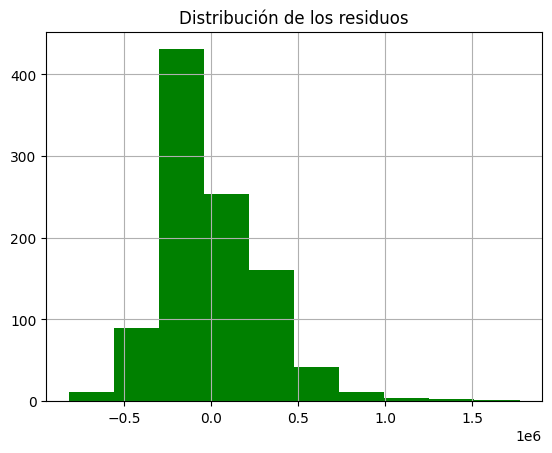

In [26]:
# Cómo están distribuidos los residuos?
modelo_0.resid.hist(color='green')
plt.title('Distribución de los residuos')
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Luri - Resumen:

En esta clase, se aborda el concepto de residuos en el contexto de la regresión lineal, específicamente en la evaluación del coeficiente de determinación. Se explica que el coeficiente de determinación indica que el área del primer piso solo explica el 37% de la variación del precio de los inmuebles, dejando un 62% sin explicación.

Se introducen los residuos como la diferencia entre las observaciones reales y los valores predichos por el modelo. Se presentan ejemplos específicos de residuos para diferentes áreas de casas, destacando la importancia de que estos residuos sean lo más cercanos a cero posible.

Se analiza la distribución de los residuos a través de un histograma, donde se observa que muchos residuos son negativos, lo que sugiere que el modelo tiende a sobreestimar los precios de los inmuebles. Se discute la idealización del modelo, donde un gráfico perfecto mostraría una línea recta sobre el cero, indicando un buen ajuste.

Finalmente, se concluye que el modelo actual, al utilizar solo el área del primer piso, no es suficientemente explicativo y presenta un margen de error significativo. Se anticipa que en la próxima clase se obtendrá el coeficiente de determinación para un conjunto de datos de prueba.

## Luri - Analogía: 

Imagina que estás tratando de predecir el precio de una casa basándote únicamente en su área, como si estuvieras intentando adivinar el peso de una persona solo mirando su altura. Aunque la altura puede darte una idea, no es el único factor que influye en el peso, así como el área de una casa no es el único elemento que determina su precio.

En esta clase, el coeficiente de determinación es como un termómetro que mide cuán bien tu predicción (el precio de la casa) se ajusta a la realidad. Si el termómetro marca 37 grados, significa que solo tienes una idea parcial de la temperatura real, dejando un 62% de incertidumbre. Esto es similar a cómo el área del primer piso solo explica una parte de la variación en el precio de las casas.

Los residuos son como las diferencias entre lo que pensabas que pesaba la persona y su peso real. Si pensabas que alguien pesaba 70 kg, pero en realidad pesa 80 kg, esa diferencia de 10 kg es un residuo. En el contexto de la clase, los residuos indican cuánto se desvía tu predicción del precio real de la casa.

Cuando observamos la distribución de los residuos en un histograma, es como ver un gráfico que muestra cuántas veces te has equivocado al adivinar el peso de las personas. Si la mayoría de tus errores son negativos, significa que tiendes a subestimar el peso, así como el modelo tiende a sobreestimar el precio de las casas.

Finalmente, un modelo ideal sería como tener una balanza perfecta que siempre da el peso exacto. En este caso, un gráfico que muestre los residuos en cero indicaría que tus predicciones son muy precisas. Sin embargo, al observar los residuos, notamos que hay un margen de error considerable, lo que sugiere que necesitamos considerar más factores para hacer mejores predicciones sobre el precio de las casas.

## 09 Previsión del modelo inicial


## Obteniendo el $R^2$ de la previción

In [27]:
# definindo la Y prevista
y_predict = modelo_0.predict(x_test)


In [28]:
# importando el r2_score
from sklearn.metrics import r2_score

In [29]:
# Mostrando el resultado del R²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de :{round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de :0.39


## Luri - Resumen:

En esta clase del curso "Data Science: probando relaciones con regresión lineal", se abordaron varios aspectos clave relacionados con el análisis y la evaluación de un modelo de regresión lineal.

Primero, se explicó cómo se entrenó el modelo y se analizó su explicabilidad, revisando los coeficientes que afectan el precio de venta de un inmueble en función del área del primer piso. Luego, se introdujo la prueba del modelo utilizando datos que nunca había visto, creando una variable `y_predict` para estimar los valores con `modelo0.predict` y los datos de prueba `X_test`.

Se evaluó el modelo utilizando el coeficiente de determinación R², importando `r2_score` de `sklearn.metrics` para medir qué tan bien el modelo realizó las predicciones. Se mostró cómo redondear el coeficiente R² a dos decimales y se reflexionó sobre la generalización del modelo, destacando que, aunque el modelo generaliza relativamente bien, aún queda un 61% de variación del precio sin explicar.

Finalmente, se mencionó que en la próxima clase se incorporarán otros atributos para generar nuevos modelos y observar su comportamiento

## Luri - Analogía:

Imagina que estás construyendo una casa (tu modelo de regresión) y que el área del primer piso es solo una de las muchas características que pueden influir en el precio de la casa. En esta clase, hemos estado trabajando en cómo diseñar y evaluar esta casa.

* ### Entrenamiento del modelo:

 Piensa en esto como el proceso de planificar tu casa. Has decidido que el área del primer piso es un factor importante, así que comienzas a construir basándote en esa información. Has analizado cómo el tamaño del primer piso afecta el precio, como si estuvieras eligiendo los materiales y el diseño.

* ### Prueba del modelo:

 Ahora que has construido tu casa, es hora de mostrarla a personas que nunca la han visto (los datos de prueba). Quieres saber si les gusta y si creen que el precio es justo. Aquí, y_predict es como las opiniones que recibes sobre el precio de tu casa basado en su tamaño.

* ### Evaluación con el coeficiente de determinación R²:

 Esto es como recibir una calificación sobre cuán bien tu casa cumple con las expectativas de los visitantes. Un R² de 0.385 significa que, aunque tu casa tiene un buen diseño, hay muchas cosas que podrían mejorar para que los visitantes estén más satisfechos con el precio. En este caso, un 61% de la variación del precio no se explica solo por el área del primer piso, lo que indica que hay otros factores importantes que no has considerado.

* ### Reflexión sobre la generalización:

 Aunque tu casa es atractiva y tiene un buen diseño, eso no significa que sea perfecta. Hay muchas otras características (como el número de habitaciones, la ubicación, etc.) que podrían hacer que el precio sea más justo. Esto nos recuerda que siempre hay espacio para mejorar y que debemos considerar más factores para hacer un modelo más robusto.

* ### Próximos pasos:

 En la próxima clase, será como si decidieras agregar un segundo piso o un jardín a tu casa. Incorporarás nuevos atributos para ver cómo afectan el precio y cómo puedes hacer que tu casa sea aún más atractiva para los visitantes.

Así, a través de esta analogía, podemos entender mejor cómo se construye, evalúa y mejora un modelo de regresión lineal en el contexto de la predicción de precios.

##  10 Hazlo como yo lo hice: analizando la variable respuesta

Durante esta clase, nos enfocamos en analizar el comportamiento de la variable respuesta, es decir, comprender el precio de venta de la casa.

Para esto, hicimos un histograma como recurso visual para facilitar este análisis.

In [30]:
datos.columns

Index(['Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente',
       'preco_de_venda'],
      dtype='object')

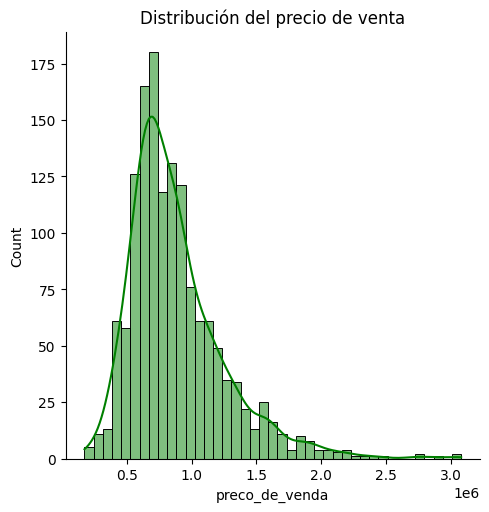

In [31]:
sns.displot(datos['preco_de_venda'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

En esta actividad, aplica la función `displot` de la biblioteca `Seaborn (sns)` y explora los aspectos de la visualización de datos. Para ello, utiliza tus conocimientos adquiridos hasta el momento y desarrolla tus habilidades aún más.

Esta función se usa para crear un gráfico de distribución. El parámetro `kde=True` indica que queremos trazar la densidad de kernel estimada sobre el histograma. A través de este ejercicio práctico, tendrás la posibilidad de visualizar la forma de la distribución con más suavidad.

## Opinión del instructor

Al ejecutar, pudimos identificar una asimetría en los datos. Tenemos algunos inmuebles cuyo precio de venta está lejos del comportamiento mediano, es decir, la presencia de valores muy altos sugiere la existencia de propiedades de alto valor, en comparación con la mayoría de las otras propiedades en el conjunto de datos.

Vale la pena señalar que identificar simetría en la distribución de la variable respuesta puede facilitar la interpretación de los resultados, ya que los valores extremos pueden influir en el análisis y las decisiones tomadas con base en el modelo de regresión lineal.

##  11 ¿Qué aprendimos?

En esta clase, aprendiste a:

* **Dividir la base de datos para entrenar y probar el modelo;**


* **Interpretar los coeficientes de regresión lineal simple;**

* **Calcular e interpretar el coeficiente de determinación R²;**

* **Analizar cuánto se desvía cada punto de datos de la línea de regresión ajustada a través de los residuos;**

* **Comprender qué tan bien se ajustan los valores observados al modelo de regresión con R²;**

* **Calcular el R² en el conjunto de prueba.**

# 03 - Agregando otros factores

## 01 - Proyecto del aula anterior

## 02 - Analizando con pairplot
 



El modelo de un solo factor arrojó un R² de 0,37, lo que significa que aproximadamente el 37 % de la variación observada en los precios de la vivienda se puede explicar por la variación en la superficie.
Esto indica que aún existe una cantidad significativa de variación que este modelo en particular no captura. Analicemos otros factores que explican los precios de la vivienda.

## Analizando los factores

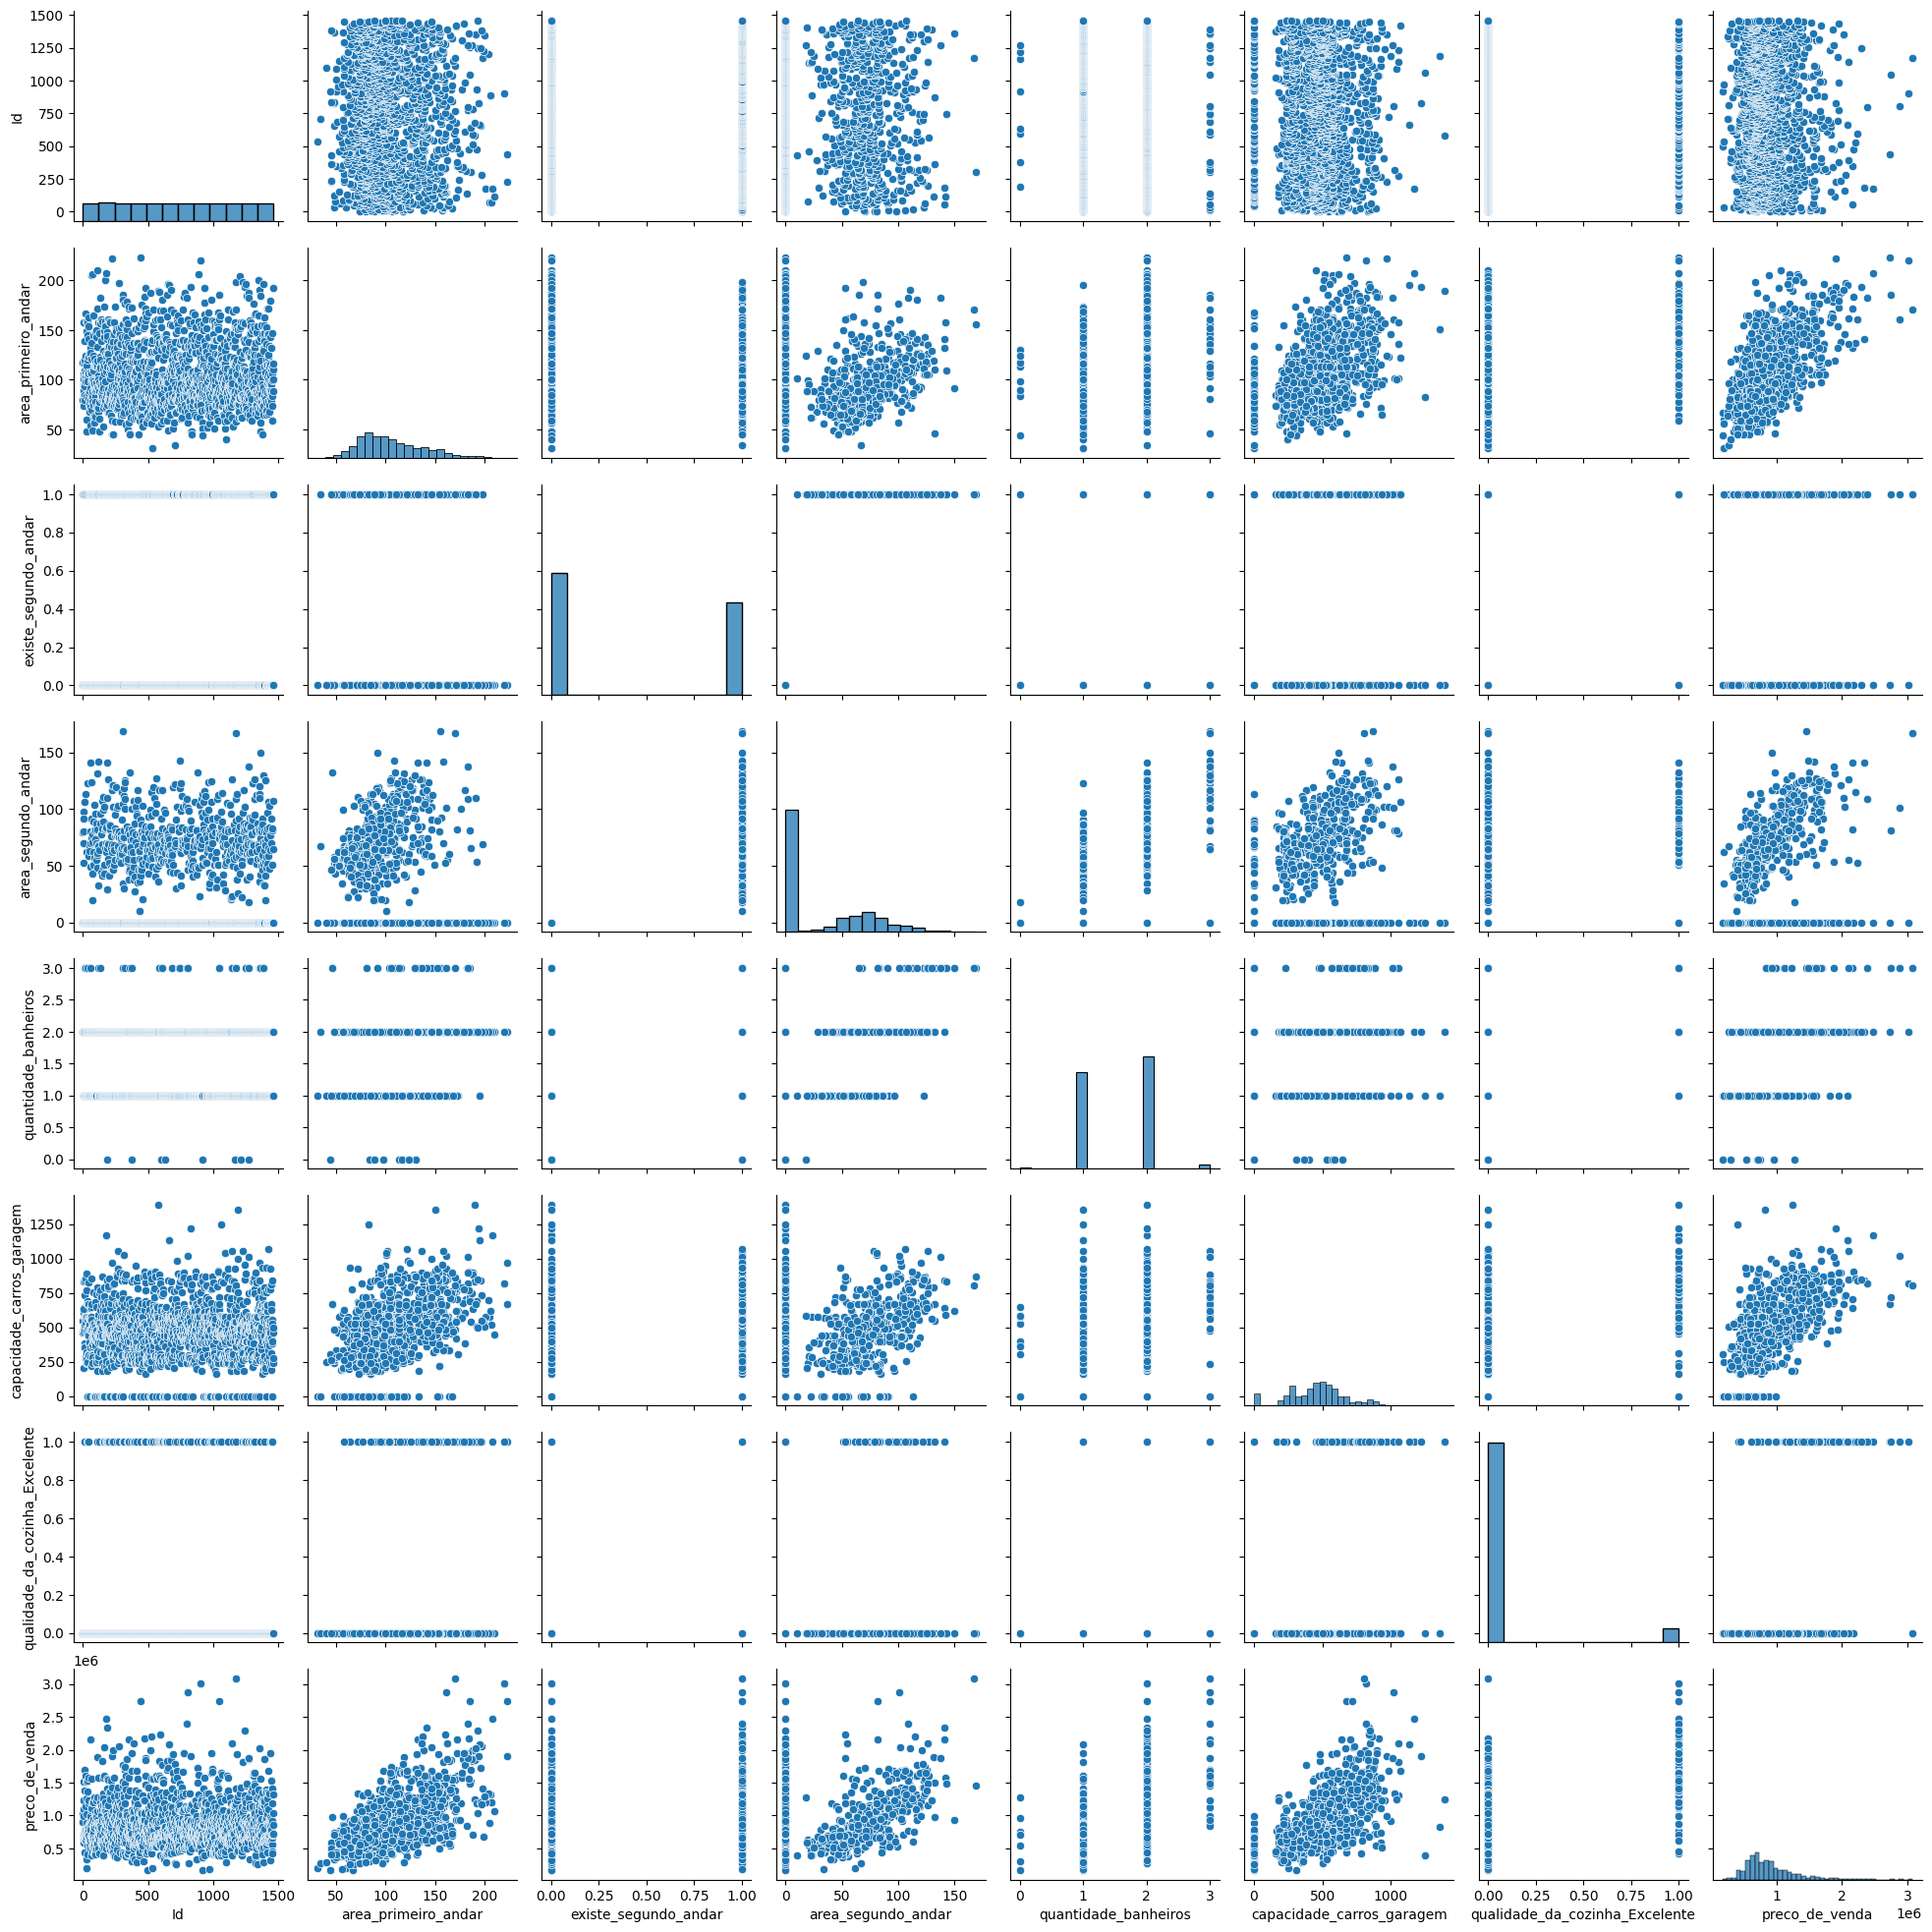

In [37]:
# ¿Qué otras características podrían explicar el precio de los bienes raíces?
sns.pairplot(datos)

In [38]:
datos.columns

Index(['Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente',
       'preco_de_venda'],
      dtype='object')

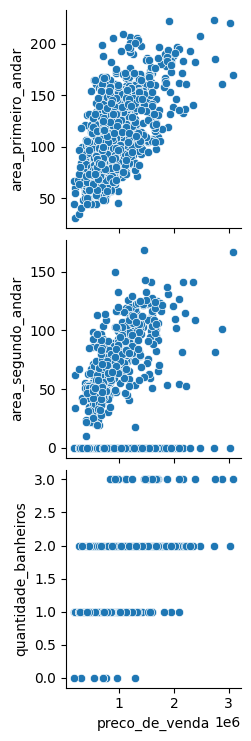

In [40]:
# Vamos a analizar solamente y_vars ='preco_de_venda'
sns.pairplot(datos, y_vars=['area_primeiro_andar','area_segundo_andar','quantidade_banheiros'], x_vars='preco_de_venda')  


## Luri - Resumen:

En la Clase 3 del curso "Data Science: probando relaciones con regresión lineal", se explora cómo otros atributos pueden influir en el precio de las casas, además del área del primer piso. Se introduce el uso de `pairplot` de la biblioteca Seaborn para visualizar las relaciones entre diferentes variables y el precio de venta de las casas.

Se discute que el coeficiente de determinación R² es de 0.38, lo que indica que el 38% de la variación en el precio de las casas se explica por el área del primer piso, dejando un 62% sin explicación clara. A través de gráficos de dispersión generados por `pairplot`, se observa que hay una tendencia positiva en la relación entre el precio y variables como el área del segundo piso y la cantidad de baños.

Se enfatiza la importancia de focalizarse en variables específicas para un análisis más claro y se menciona que, aunque se pueden hacer observaciones manuales, existen métodos automáticos que facilitan este proceso. La clase concluye con la promesa de incorporar nuevos atributos en futuros modelos.

## Luri - Analogía:

Imagina que estamos organizando una fiesta y queremos entender qué factores hacen que la fiesta sea más exitosa, es decir, que más personas asistan y se diviertan. En esta analogía, el "precio de las casas" representa la "diversión de la fiesta".

* ### Área del primer piso:

 Piensa en esto como el tamaño del salón donde se lleva a cabo la fiesta. Si el salón es pequeño, solo unas pocas personas pueden estar cómodas, lo que podría limitar la diversión. En nuestra clase, descubrimos que el área del primer piso explica un 38% de la diversión, pero hay un 62% que no sabemos por qué no se logra.

* ### Otros atributos:

 Ahora, consideremos otros factores que podrían influir en la diversión, como la música, la comida y la cantidad de juegos. Estos son los "atributos adicionales" que estamos analizando. Al igual que en la fiesta, donde la música puede hacer que la gente se sienta más animada, en el análisis de precios de casas, atributos como el área del segundo piso y la cantidad de baños también afectan el precio.

* ### Pairplot:

 Imagina que pairplot es como un gran mural donde colocamos fotos de diferentes momentos de la fiesta. Cada foto representa una combinación de factores (música, comida, juegos) y cómo estos se relacionan con la diversión. Al observar el mural, podemos ver patrones: por ejemplo, cuando hay más juegos, la diversión tiende a aumentar.

* ### Focalización en variables específicas:

 Si queremos entender mejor qué hace que la fiesta sea más divertida, podemos enfocarnos en ciertos aspectos, como solo la música y la comida. Esto es similar a cómo en la clase nos centramos en el precio de venta en relación con el área del primer piso, el área del segundo piso y la cantidad de baños.

* ### Métodos automáticos:

 Finalmente, aunque podemos hacer observaciones manuales sobre lo que hace que la fiesta sea divertida, también hay herramientas (como los métodos automáticos) que pueden ayudarnos a analizar estos factores de manera más eficiente, como un asistente que nos dice qué música y comida son las más populares sin que tengamos que estar observando todo el tiempo.

En resumen, al igual que en la organización de una fiesta, en el análisis de precios de casas, es importante considerar múltiples factores y cómo se relacionan entre sí para entender mejor el resultado final.

##  03 Importancia de las variables

Imagina que eres un(a) analista de datos trabajando en el Banco Bytebank. Este banco desea ofrecer a sus clientes préstamos con tasas de interés más precisas, basadas en un análisis detallado del valor de las propiedades. Para ello, debes desarrollar un modelo de regresión lineal que pueda predecir el precio de venta de casas en función de diversas características.

Inicialmente, ajustaste un modelo, utilizando solo el tamaño del primer piso como variable. Sin embargo, para mejorar tu modelo, decides explorar otros factores que pueden influir en el precio de venta, utilizando la herramienta pairplot para visualizar las relaciones entre estas variables y el precio.

¿Cuál de las siguientes afirmaciones describe mejor la importancia de incluir múltiples variables explicativas en el modelo de regresión lineal?

### Al agregar más variables explicativas relacionadas con el precio de venta de las casas, el modelo se vuelve menos propenso a sesgos, ya que considera una gama más amplia de características que afectan el valor de la propiedad, proporcionando estimaciones más precisas.

La inclusión de más variables explicativas puede ayudar a reducir el sesgo y mejorar la precisión del modelo, considerando una variedad más amplia de factores que influyen en el precio de una propiedad.

# Luri - Analogía:

¡Claro! Imagina que estás organizando una fiesta y quieres asegurarte de que todos se diviertan. Al principio, solo piensas en el tamaño del lugar como un factor importante. Sin embargo, a medida que avanzas, te das cuenta de que hay otros elementos que también son cruciales para el éxito de la fiesta, como la música, la comida, la iluminación y la decoración.

En este contexto, el "tamaño del primer piso" es como el tamaño del lugar de la fiesta. Es un factor importante, pero no es el único que influye en la diversión de los invitados. Al igual que al considerar otros aspectos de la fiesta, en el ejercicio se busca incluir múltiples variables (como el número de habitaciones, la ubicación, el estado de la propiedad, etc.) para predecir el precio de venta de las casas.

Así, al agregar más variables explicativas, el modelo de regresión lineal se vuelve más completo y preciso, similar a cómo una fiesta bien planificada, que considera todos los detalles, resulta en una experiencia más agradable para todos. ¿Te gustaría explorar más sobre cómo identificar esas variables adicionales?

## 04 Añadiendo variables al modelo


In [41]:
# importando la api de statsmodels
import statsmodels.api as sm


In [42]:
# Añadiendo una constante
x_train = sm.add_constant(x_train)
x_train.head()


,const,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,1324,65.7732,0,0.0000,1,0,0
326,1.0,330,55.3684,1,55.3684,1,189,0
386,1.0,392,74.6916,1,107.4853,2,560,0
615,1.0,626,103.6764,0,0.0000,1,440,0
236,1.0,238,94.2006,1,67.8170,2,457,0


In [43]:
x_train.columns

Index(['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [46]:
# Creando el modelo  de regresion(con todas las variables): saturado
modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
                            'area_segundo_andar', 'quantidade_banheiros',
                            'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [47]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
                            'quantidade_banheiros','capacidade_carros_garagem',
                            'qualidade_da_cozinha_Excelente']]).fit()

In [48]:
# Modelo sin la info de garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train,
                  x_train[['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
                            'quantidade_banheiros','qualidade_da_cozinha_Excelente']]).fit()

In [61]:
# Resumen del modelo
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]
for i, j in enumerate(modelos):
    print(f'******************************************************************************\n******************** El Modelo {i} tiene el siguiente resumen ******************\n******************************************************************************')
    print(j.summary(),'\n\n')


******************************************************************************
******************** El Modelo 0 tiene el siguiente resumen ******************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        09:38:30   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust               

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     408.8
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          6.25e-288
Time:                        09:38:30   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.730e+04
Df Residuals:                     998   BIC:                         2.733e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Luri - Resumen:

En esta clase, se abordó el proceso de añadir variables a un modelo de regresión lineal para mejorar la explicación de la variación del precio de las casas. Se importó la API de StatsModels y se añadió una constante al modelo utilizando `sm.add_constant`.

Se creó un modelo de regresión saturado `(modelo1)` que incluía todas las variables disponibles, seguido de la creación de modelos alternativos `(modelo2` y `modelo3)`, eliminando ciertas variables como el área del segundo piso y la información del garaje.

Se resumieron todos los modelos en una lista y se utilizó un bucle para presentar los resultados de cada modelo de manera organizada, con un formato claro que incluía asteriscos para mejorar la visualización.

Finalmente, se concluyó que en la próxima clase se analizarán los resultados de la regresión OLS para determinar cuál modelo se ajusta mejor a los datos.

## Luri - Analogía:

Imagina que estás construyendo una casa y quieres asegurarte de que sea lo más cómoda y funcional posible. En esta clase, el proceso de añadir variables a un modelo de regresión lineal es similar a elegir diferentes características para tu casa que pueden influir en su valor.

* ### Importación de la API de StatsModels:

 Piensa en esto como elegir las herramientas adecuadas para construir tu casa. StatsModels es como un conjunto de herramientas que te permite trabajar con los datos de manera efectiva.

* ### Añadiendo una Constante al Modelo:

 Esto es como asegurarte de que tu casa tenga una base sólida. La constante ayuda a establecer un punto de partida (o intersección) en el eje Y, similar a cómo una buena fundación es crucial para la estabilidad de una casa.

* ### Creación del Modelo de Regresión Saturado:

 Aquí, estás diseñando la casa con todas las características posibles: habitaciones, baños, cocina, etc. Este modelo incluye todas las variables que podrían afectar el precio, como si tu casa tiene un segundo piso o un garaje.

* ### Ajuste del Modelo Saturado:

 Es como hacer ajustes en el diseño de la casa para asegurarte de que todo encaje bien. Al ajustar el modelo, estás entrenando tu modelo con los datos de entrenamiento, asegurándote de que funcione correctamente.

* ### Creación de Modelos Alternativos:

 Imagina que decides hacer algunas modificaciones en tu diseño original. Tal vez eliminas el segundo piso o decides no incluir un garaje. Esto se traduce en los modelos alternativos que se crean al eliminar ciertas variables.

* ### Resumen de los Modelos:

 Aquí, estás haciendo un recorrido por tu casa terminada y observando cómo cada habitación se ve y se siente. Al presentar los resultados de cada modelo, estás evaluando cómo cada diseño (modelo) se compara con los demás.

* ### Ejecución y Visualización de Resultados:

 Finalmente, es como invitar a amigos a ver tu casa. Quieres que todo se vea bien y que cada habitación esté bien presentada, así que organizas la información de manera clara y atractiva.

En resumen, esta clase es como el proceso de diseñar y construir una casa, donde cada decisión sobre qué incluir o excluir afecta el valor y la funcionalidad final del hogar. En la próxima clase, se analizarán los resultados para ver cuál diseño es el más efectivo, similar a evaluar cuál casa es la más atractiva y cómoda para vivir.

## 05 Analizando los modelos


In [62]:
for i,j in enumerate(modelos):
    print(f'El coeficiente de determinación R² del modelo {i} es de: {j.rsquared.round(2)}')

El coeficiente de determinación R² del modelo 0 es de: 0.38
El coeficiente de determinación R² del modelo 1 es de: 0.74
El coeficiente de determinación R² del modelo 2 es de: 0.71
El coeficiente de determinación R² del modelo 3 es de: 0.65


## Luri - Resumen: 

En esta clase, se analizan diferentes modelos de regresión lineal y sus coeficientes de determinación (R²). Se observa que el modelo 1 tiene el coeficiente más alto (74%), mientras que el modelo 0 tiene el más bajo (38%). Se discute el efecto de las variables en el precio de las casas, destacando que el área del primer piso tiene un efecto positivo, mientras que la presencia de un segundo piso inicialmente parece tener un efecto negativo, pero al considerar su área, se vuelve positivo.

Se introduce el concepto de multicolinearidad, que ocurre cuando los efectos de las variables se solapan, dificultando la interpretación de su impacto individual en la variable dependiente (precio de la casa). Se sugiere que es mejor seleccionar variables que tengan efectos aislados para mejorar el modelo.

Finalmente, se analiza el modelo 3, donde todos los efectos son positivos, indicando que tener un segundo piso, la cantidad de baños y la calidad de la cocina influyen positivamente en el precio de las casas. Se concluye que tanto el modelo 1 como el modelo 2 presentan problemas de multicolinearidad y no son los mejores candidatos para la regresión lineal.

## Luri - Analogía:

Imaginemos que estamos organizando una fiesta y queremos saber qué factores influyen en la satisfacción de los invitados. Cada uno de los modelos de regresión lineal que analizamos en la clase representa una forma diferente de entender cómo los elementos de la fiesta afectan la felicidad de los asistentes.

* ### Modelos como recetas:

 Cada modelo es como una receta para un platillo. En la receta, los ingredientes (variables) deben estar bien equilibrados. Si usamos demasiados ingredientes similares, como sal y salsa de soya, el sabor se solapa y no podemos identificar cuál de ellos realmente mejora el platillo. Esto es lo que sucede con la multicolinearidad en nuestros modelos; algunas variables se superponen y dificultan entender su impacto individual.

* ### Coeficiente de determinación (R²) como el termómetro de satisfacción:

 El coeficiente de determinación es como un termómetro que mide cuán feliz están nuestros invitados. Un R² alto significa que la fiesta está siendo un éxito y que estamos haciendo un buen trabajo al elegir los factores que contribuyen a la felicidad. En nuestro caso, el modelo 1 tiene el termómetro más alto (74%), lo que indica que estamos en el camino correcto.

* ### Efectos de las variables como luces de la fiesta:

 Imagina que cada variable (como el área del primer piso o la cantidad de baños) es una luz en la fiesta. Algunas luces pueden hacer que el ambiente sea más brillante (efecto positivo), mientras que otras pueden parecer que lo oscurecen (efecto negativo). Sin embargo, al observar cómo se combinan las luces, podemos ver que algunas, como el área del segundo piso, pueden parecer que oscurecen al principio, pero al considerar su tamaño, realmente iluminan el ambiente.

* ### Selección de variables como elegir los mejores invitados:

 Al igual que en una fiesta, donde queremos invitar a las personas que realmente aportan algo positivo, en nuestros modelos debemos seleccionar variables que tengan efectos claros y aislados. Si tenemos dos variables que se refieren a lo mismo (como "segundo piso" y "área del segundo piso"), es mejor elegir solo una para evitar confusiones.

En resumen, al igual que en la organización de una fiesta exitosa, en la regresión lineal necesitamos elegir cuidadosamente nuestras variables y entender cómo interactúan entre sí para lograr un modelo que realmente refleje la realidad.

Copiar texto de Luri al portapapeles


##  06 El papel del R² en la selección del modelo

En un proyecto de análisis de datos, un científico de datos compara cuatro modelos estadísticos para predecir el precio de las casas. Cada modelo utiliza un conjunto diferente de variables explicativas. El científico observa que los modelos con más variables tienen valores de R² más altos, pero es consciente de que esto puede no ser el único factor para elegir el mejor modelo. Con base en esta situación, ¿cuál de las siguientes afirmaciones es la más adecuada para seleccionar el modelo más apropiado? Elija una alternativa.

### Prefiera el modelo con el R² ajustado más alto, ya que este tiene en cuenta el número de variables explicativas, ayudando a evitar el sobreajuste.

"El R² ajustado es una medida más robusta que el R² simple, ya que penaliza la inclusión de variables que no contribuyen significativamente al modelo. Esto ayuda a equilibrar la complejidad del modelo con su capacidad explicativa, proporcionando una base más sólida para la elección del modelo."

## Luri - Analogía: 

Claro, vamos a desglosar el enunciado del ejercicio utilizando una analogía.

Imagina que estás en una competencia de cocina, donde varios chefs están tratando de preparar el mejor platillo. Cada chef tiene una receta diferente, que representa un modelo estadístico, y cada ingrediente que utilizan es como una variable explicativa. Algunos chefs utilizan muchos ingredientes (variables), mientras que otros prefieren recetas más simples con menos ingredientes.

En esta competencia, los jueces (que serían como el R²) evalúan qué tan bien cada platillo cumple con las expectativas de sabor y presentación. Un chef que usa muchos ingredientes puede obtener una puntuación alta, pero eso no significa necesariamente que su platillo sea el mejor. Podría ser que la combinación de tantos ingredientes lo haga complicado y difícil de disfrutar.

Ahora, en lugar de solo mirar la puntuación total de cada platillo, los jueces también consideran si la complejidad de la receta realmente mejora el sabor. Aquí es donde entra el R² ajustado: es como un juez que dice: "Sí, este platillo tiene muchos ingredientes, pero ¿realmente todos son necesarios? ¿O algunos solo están ahí para hacer que la receta suene más impresionante?"

Así, el ejercicio nos invita a reflexionar sobre cómo elegir el mejor modelo (o platillo) no solo basándonos en cuántas variables (o ingredientes) tiene, sino también en cómo esas variables contribuyen realmente a la calidad del modelo (o del platillo).

##  07 Para saber más: refinando la selección de modelos

En la clase sobre comparación de modelos de regresión lineal, exploramos cómo evaluar y seleccionar el modelo más adecuado utilizando el R² y otros criterios. Además de la selección manual que discutimos, existen métodos automáticos de selección de variables que pueden ser extremadamente útiles en situaciones donde el número de variables explicativas es grande. Estos métodos, como `stepwise`, `backward` y `forward selection`, siguen criterios predefinidos para agregar o eliminar variables del modelo de forma iterativa. Explora a continuación los métodos automáticos de selección de variables, que buscan equilibrar la complejidad del modelo y su capacidad explicativa.

* El método de `forward selection` comienza con un modelo sin variables explicativas y agrega una a una, eligiendo en cada paso la variable que más mejora el modelo de acuerdo con un criterio estadístico específico, como el menor valor de p-valor o el mayor aumento en el R² ajustado.

* El `backward selection` inicia con todas las variables posibles en el modelo y, de manera iterativa, elimina la variable que menos contribuye al modelo, nuevamente basándose en criterios como el p-valor o el impacto en el R² ajustado.

* El `stepwise selection` es una combinación de los dos métodos anteriores, donde las variables pueden ser agregadas o eliminadas en cada paso, dependiendo de su contribución a la mejora del modelo.

Estos métodos de `selección automática` son herramientas poderosas que ayudan en la identificación del modelo más parsimonioso, es decir, aquel que puede explicar los datos de manera eficiente sin ser excesivamente complejo. Sin embargo, es crucial que el científico de datos comprenda y supervise el proceso, ya que la elección automática puede, a veces, introducir sesgo o sobreajuste, especialmente si el criterio de selección no es bien elegido o si el modelo no es validado adecuadamente con datos nuevos o de prueba.

## Luri - Dame un ejemplo:

Claro, aquí tienes un ejemplo práctico sobre cómo aplicar los métodos de selección de variables en un modelo de regresión lineal.

Imagina que estás trabajando con un conjunto de datos que contiene información sobre casas, y tienes varias variables explicativas como:

* Tamaño de la casa (en metros cuadrados)
* Número de habitaciones
* Edad de la casa (en años)
* Ubicación (código postal)
* Precio de venta
* Supongamos que quieres predecir el precio de venta de las casas utilizando estas variables. Aquí es donde puedes aplicar los métodos de selección de variables.

* ### Ejemplo de Forward Selection:

Comienzas con un modelo vacío (sin variables).
Agregas la variable que más mejora el modelo, digamos que es el "Tamaño de la casa".
Luego, agregas la siguiente variable que más mejora el modelo, por ejemplo, "Número de habitaciones".
Continúas este proceso hasta que agregar más variables no mejora significativamente el modelo.

* ### Ejemplo de Backward Selection:

Comienzas con un modelo que incluye todas las variables.
Evaluas cuál de las variables tiene el menor impacto en el modelo, digamos que es "Edad de la casa".
Eliminas esa variable y vuelves a evaluar el modelo.
Repetirás este proceso hasta que todas las variables restantes sean significativas.

* ### Ejemplo de Stepwise Selection:

Comienzas con un modelo vacío o con todas las variables.
En cada paso, decides si agregar o eliminar una variable basada en su contribución al modelo.
Por ejemplo, puedes comenzar con "Tamaño de la casa" y "Número de habitaciones", y luego decidir eliminar "Edad de la casa" si no mejora el modelo.

* ### Ejercicio:
Ahora, te invito a que pienses en un conjunto de datos que te interese y elijas un método de selección de variables. ¿Cuál método crees que sería más adecuado para tu caso y por qué?



## Luri - Analogía: 

Claro, vamos a usar una analogía para entender mejor los métodos de selección de modelos en regresión lineal.

Imagina que estás organizando una fiesta y quieres asegurarte de que todo sea perfecto. Tienes una lista de elementos que podrías incluir en la fiesta, como comida, música, decoración, juegos, etc. Sin embargo, no puedes incluir todo, ya que el espacio es limitado y quieres que la fiesta sea agradable y no abrumadora.

**Analogía de la Fiesta:** 

* ### Forward Selection (Selección hacia adelante):

Comienzas con un espacio vacío (tu fiesta sin elementos).
Agregas un elemento a la vez, comenzando con lo que crees que es más importante, como la comida. Después de agregar la comida, ves que la fiesta mejora.
Luego, decides agregar música, y nuevamente notas que la fiesta se vuelve más animada.
Sigues este proceso, añadiendo elementos uno a uno, hasta que sientes que ya no hay espacio para más o que agregar algo más no mejora la fiesta.

* ### Backward Selection (Selección hacia atrás):

Comienzas con todos los elementos que pensaste incluir en la fiesta.
Luego, evalúas cuál de esos elementos no está contribuyendo a la diversión, como un juego que nadie quiere jugar.
Eliminas ese juego y vuelves a evaluar la fiesta.
Repetirás este proceso, eliminando elementos que no aportan hasta que te quedes solo con lo que realmente hace que la fiesta sea divertida.

* ### Stepwise Selection (Selección escalonada):

Comienzas con algunos elementos, como comida y música.
A medida que avanzas, decides si agregar más elementos o eliminar algunos, dependiendo de cómo se siente la fiesta. Por ejemplo, si la música es muy buena, puedes decidir agregar un juego para mantener la energía alta, o si la comida es suficiente, puedes eliminar un elemento que no es necesario.
Este proceso es dinámico, ya que puedes ajustar la fiesta en función de cómo va.

* ### Conclusión:
Así como en la organización de una fiesta, donde buscas el equilibrio entre lo que es necesario y lo que puede ser excesivo, en la selección de modelos de regresión lineal, buscas el modelo que explique los datos de manera eficiente sin ser demasiado complejo. Es importante que, al igual que en la fiesta, supervises el proceso para asegurarte de que todo funcione bien.



## 08 Analizando el efecto


## Comparando los modelos
### Cúal es el mejor modelo


In [ ]:
print("R²")


In [63]:
# Cúantos parámetros tiene el modelo?
modelo_3.params



const                            -127715.728552
Id                                    -3.349078
area_primeiro_andar                 6120.511406
existe_segundo_andar              221390.466036
quantidade_banheiros              149056.141706
qualidade_da_cozinha_Excelente    444412.671077
dtype: float64

## Luri - Resumen:

En esta clase, se analizó el efecto de la multicolinealidad en los modelos de regresión lineal, destacando que el modelo 3 es el más adecuado para el análisis. Se revisaron los parámetros de este modelo, donde se observó que el valor de los inmuebles aumenta en aproximadamente $6,120 por cada metro cuadrado en el área del primer piso, con un margen de error aceptable.

Se utilizó el método OLS (Mínimos Cuadrados Ordinarios) para excluir efectos atípicos y se discutió cómo ciertas características de la casa afectan su valor. Por ejemplo, tener un segundo piso incrementa el valor en $221,000, y cada baño adicional suma $149,000 al precio. Además, una cocina excelente puede aumentar el valor en $444,000, con una variación de aproximadamente $28,830.

Finalmente, se enfatizó la importancia de realizar mejoras en la casa, como agregar baños o remodelar la cocina, ya que esto influye significativamente en el precio del inmueble. En la próxima clase, se introducirán casas nuevas al modelo para evaluar cómo se puede atribuir el precio a cada una de ellas.

##  09 Manos a la obra: análisis y selección de modelos de regresión lineal

Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este `dataset`.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

1\)-análisis inicial con el PairPlot de Seaborn;

2\)-construir modelos de regresión lineal; y
realizar la comparación de estos modelos.

3\)-Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.



In [66]:
import pandas as pd
df = pd.read_csv('../data/hoteis.csv')
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## Paso 1: Análisis con PairPlot

In [67]:
import seaborn as sns

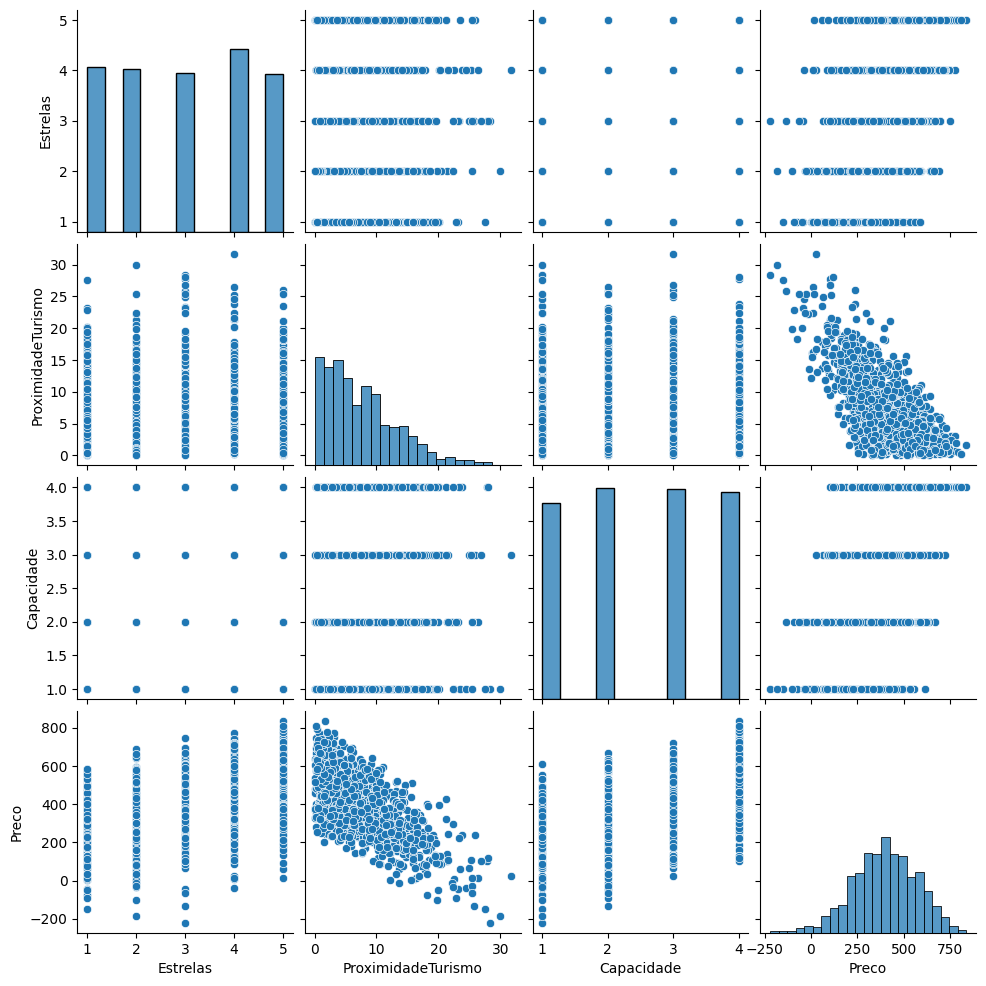

In [68]:
sns.pairplot(df)

## Paso 2: Construcción de modelos de regresión lineal

In [69]:
import statsmodels.api as sm

In [70]:
df.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

In [71]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = df[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = df['Preco']
modelo_1 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = df[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()
     

## Paso 3: Comparación de modelos

In [72]:

print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           6.09e-40
Time:                        10:56:15   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

##  10 ¿Qué aprendimos?

En esta clase, aprendiste a:

* ### Utilizar el pairplot de Seaborn para visualizar relaciones entre múltiples variables e identificar cuáles pueden influir en el precio de venta de las casas.

* ### Agregar múltiples variables explicativas al modelo de regresión lineal para mejorar la precisión de las predicciones de precios.

* ### Comparar diferentes modelos de regresión lineal utilizando el R² y el R² ajustado, además de analizar la multicolinealidad y otros factores.

* ### Descubrir cómo interpretar los coeficientes del modelo de regresión lineal para entender el impacto de cada variable en el precio de las casas. 

* ### Entender la importancia de elegir el modelo más adecuado para la predicción de precios, considerando la simplicidad, la precisión y la interpretabilidad.

# 04. Estableciendo precios para las casas

## Obtendo o R² de la previsión

In [74]:
# Añadiendo la constante en X_test
x_test = sm.add_constant(x_test)
x_test.head(2)


,const,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
997,1.0,1014,94.9438,0,0.0000,1,280,0
805,1.0,821,74.1342,1,78.2218,2,595,0


In [ ]:
# Prevendo com o modelo 3


In [ ]:
# Qual o r² da previsão?



In [ ]:
# Qual o R² do treino?



## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [ ]:
#Novo imovel







In [ ]:
# Qual o preço desse imóvel com o modelo 0?



In [ ]:
# Qual o preço desse imóvel com o modelo 3?



## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Lendo várias casas?



In [ ]:
# Adicionando uma constante



In [ ]:
# Qual o preço dessas novas casas?



# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1



In [ ]:
# VIF 3


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]



In [ ]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=     , y=      ,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos


In [ ]:
ax = sns.scatterplot(x=       , y=        , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

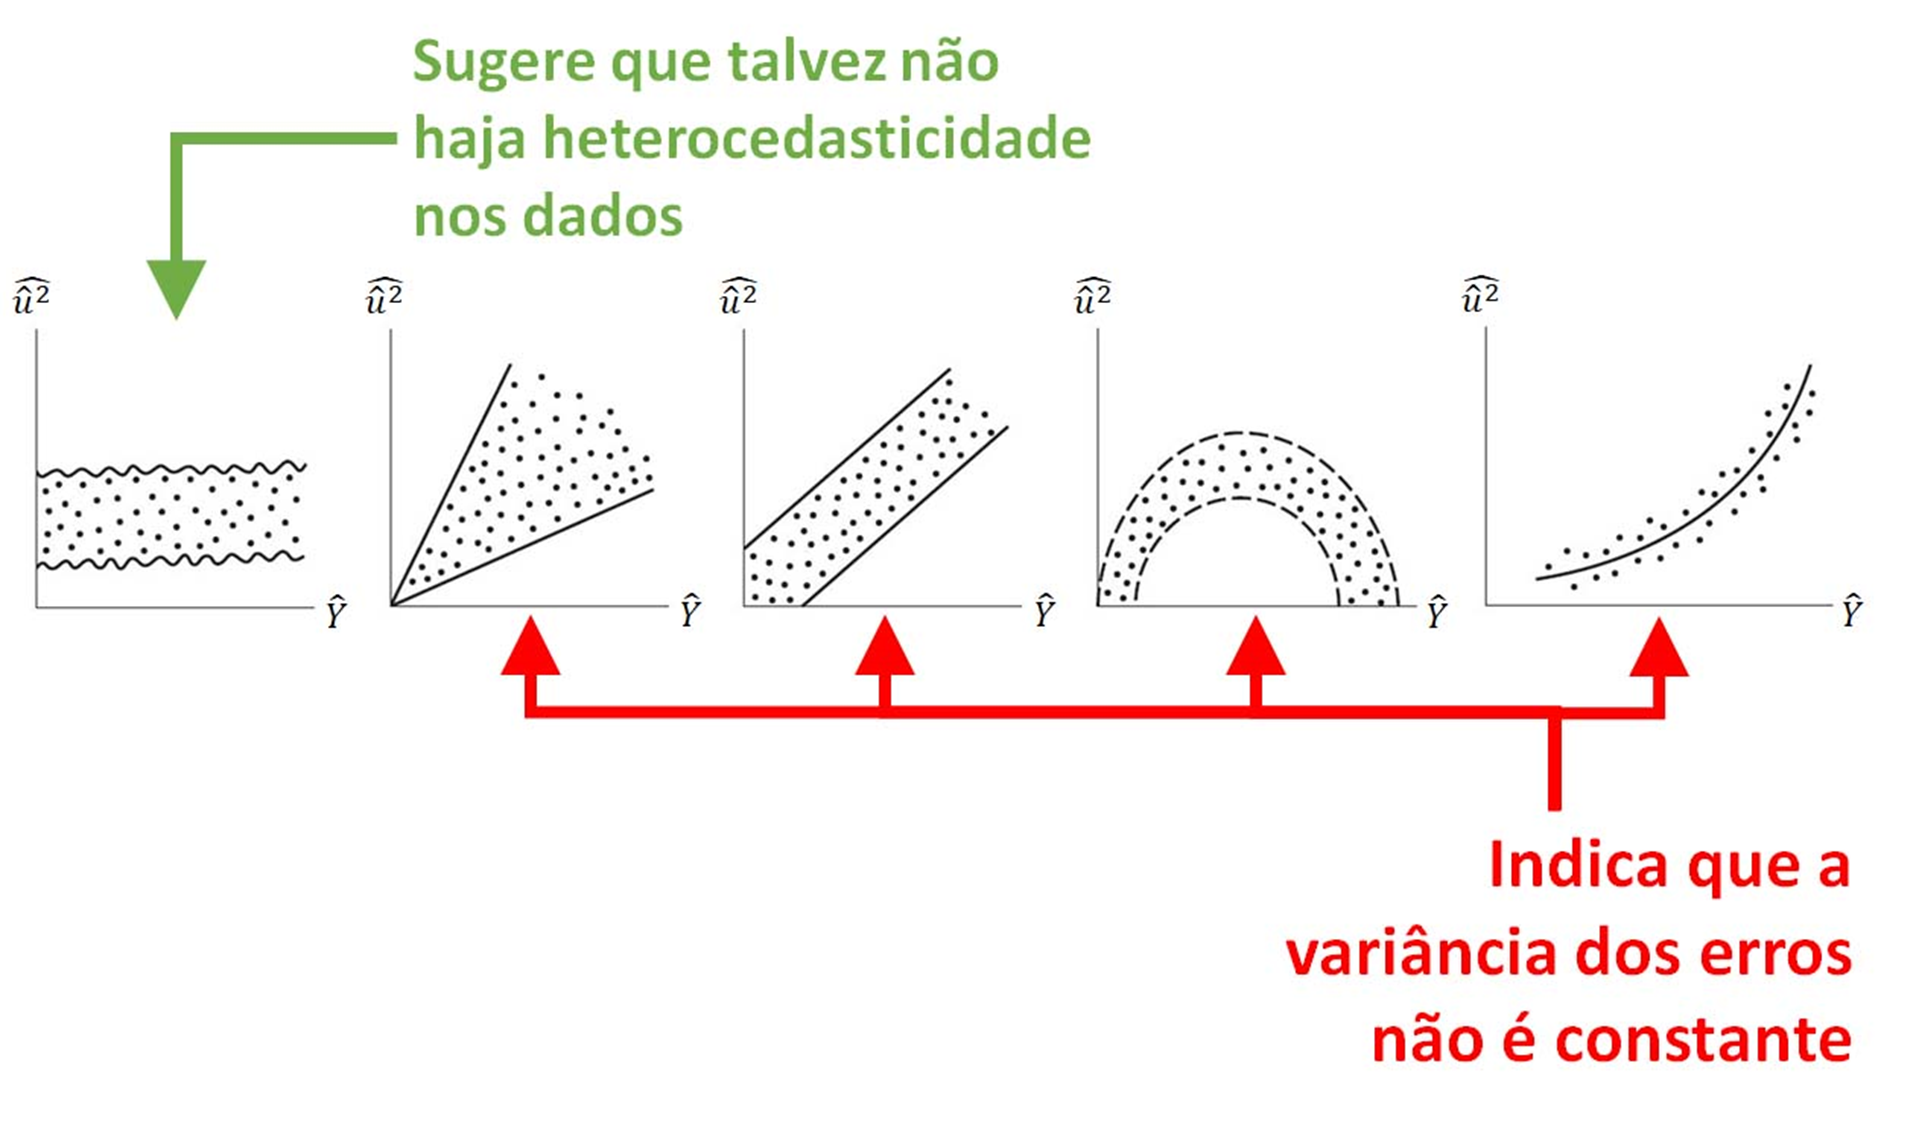